In [16]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

In [21]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Dataset-PalmOil-or-Not')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#Daftar sub-direktori
subdirectories = ['test', 'train', 'valid']

#Loop melalui setiap sub-direktori
for subdir in subdirectories:
    subdir_path = os.path.join('/content/drive/MyDrive/Dataset-PalmOil-or-Not', subdir)

    #List semua file gambar di sub-direktori
    image_files = [file for file in os.listdir(subdir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    #Tampilkan setiap gambar
    for image_file in image_files:
        image_path = os.path.join(subdir_path, image_file)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(os.path.join(subdir, image_file))
        plt.show()
#Cetak jalur saat ini
print("Current Directory:", os.getcwd())

#Cetak isi direktori "brondolan"
print("Contents of brondolan:", os.listdir('/content/drive/MyDrive/Dataset-PalmOil-or-Not'))

#Cetak isi sub-direktori "test"
print("Contents of test:", os.listdir('/content/drive/MyDrive/Dataset-PalmOil-or-Not/test'))

Current Directory: /content/drive/.shortcut-targets-by-id/1prO2M5m-UJWHD3XVG2s94eJXjtvPp2tI/Dataset-PalmOil-or-Not
Contents of brondolan: ['valid', 'train', 'test']
Contents of test: ['PalmOil', 'Others']


In [26]:
training = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_generator = training.flow_from_directory(
    '/content/drive/MyDrive/Dataset-PalmOil-or-Not/train',
    target_size=(150, 150),
    shuffle=True,
    class_mode='binary',
)
testing_generator = training.flow_from_directory(
    '/content/drive/MyDrive/Dataset-PalmOil-or-Not/test',
    target_size=(150, 150),
    shuffle=True,
    class_mode='binary',
)

Found 212 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

9406464/9406464 [==============================] - 0s 0us/step


In [28]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2340033 (8.93 MB)
Trainable params: 82049 

In [29]:
history = model.fit(training_generator, validation_data=testing_generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 83s 12s/step - loss: 0.3617 - accuracy: 0.7972 - val_loss: 0.1254 - val_accuracy: 0.9394
Epoch 2/50
7/7 [==============================] - 21s 3s/step - loss: 0.0483 - accuracy: 0.9906 - val_loss: 0.1280 - val_accuracy: 0.9394
Epoch 3/50
7/7 [==============================] - 23s 3s/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.2203 - val_accuracy: 0.9394
Epoch 4/50
7/7 [==============================] - 20s 3s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2222 - val_accuracy: 0.9394
Epoch 5/50
7/7 [==============================] - 20s 3s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1941 - val_accuracy: 0.9394
Epoch 6/50
7/7 [==============================] - 26s 4s/step - loss: 0.0117 - accuracy: 0.9953 - val_loss: 0.1798 - val_accuracy: 0.9697
Epoch 7/50
7/7 [==============================] - 20s 3s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.2040 - val_accuracy: 0.9394
Epoch 8/50
7/7 [============================

7/7 - 17s - loss: 1.9765e-05 - accuracy: 1.0000 - 17s/epoch - 2s/step


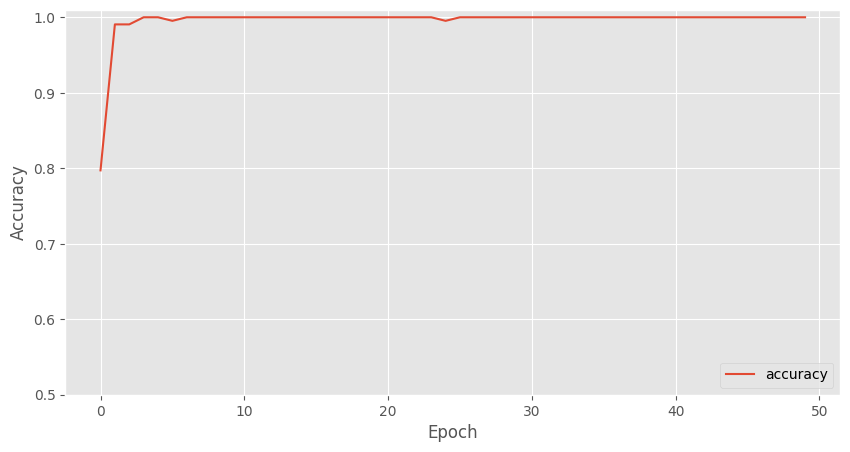

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(training_generator, verbose=2)

In [31]:
result = model.evaluate(training_generator)

7/7 [==============================] - 18s 3s/step - loss: 1.9765e-05 - accuracy: 1.0000


Saving banana-1.jpg to banana-1.jpg
1/1 [==============================] - 0s 38ms/step
1.9368893e-07
not palm oil - Failed, Akurat: 100%


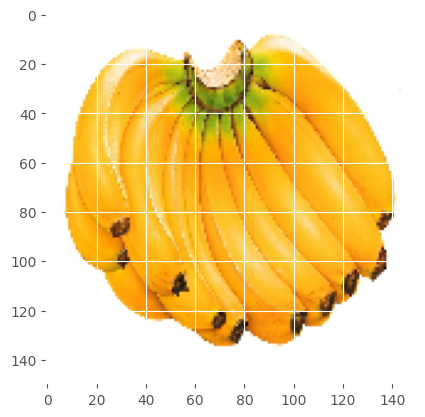

In [46]:
from google.colab import files

image_data = files.upload()
image_file = list(image_data.keys())[0]
image = tf.keras.utils.load_img(image_file, target_size=(150, 150))
image_array = tf.keras.utils.img_to_array(image)
image_array = image_array / 255.
image_array = np.array([image_array])
result_predict = model.predict(image_array)[0][0]
print(result_predict)
if(result_predict > 0.5):
  print(f'Palm Oil - Sawit, Kemiripan: {int(result_predict * 100)}%')
else:
  print(f'not palm oil - Failed, Akurat: {100 - int(result_predict * 100)}%')
plt.imshow(image)
plt.show()

In [48]:
model.save('model-nonsawit.h5')

In [49]:
# # Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# # save model.
with open('model_nonsawit.tflite','wb') as f:
  f.write(tflite_model)